#### Exercise 1.1

In [1]:
import time
import numpy as np
import math

x = np.arange(0,10,0.00001)
print("x is a %d element array"%len(x))

t0 = time.time()
y_np = np.sin(x) + np.cos(x)
print("this operation took %f seconds"% (time.time() - t0))

t0 = time.time()
y_python = [math.sin(xi) + math.cos(xi) for xi in x]
print("this operation took %f seconds"% (time.time() - t0))

x is a 1000000 element array
this operation took 0.033263 seconds
this operation took 0.355739 seconds


**Exercise 1.2**

In the cell below, we've loaded a dataframe of  Facebook likes, Twitter followers, or Wikipedia pageviews data for The Prodigy and Yoko Ono. The "value" field is the daily increase or decrease in the metric value (Facebook likes, Twitter followers, or Wikipedia pageviews).

In [2]:
%matplotlib inline
import pandas as pd
metrics = pd.read_pickle('artist_metrics_small.pkl')  # loading our data frame from a pickle file (we'll cover this in the next module)

#part a
metrics['date'] = pd.to_datetime(metrics['date'])  # convert to datetime
metrics.loc[:4, 'date']

0   2014-04-01
1   2014-04-02
2   2014-04-03
3   2014-04-04
4   2014-04-05
Name: date, dtype: datetime64[ns]

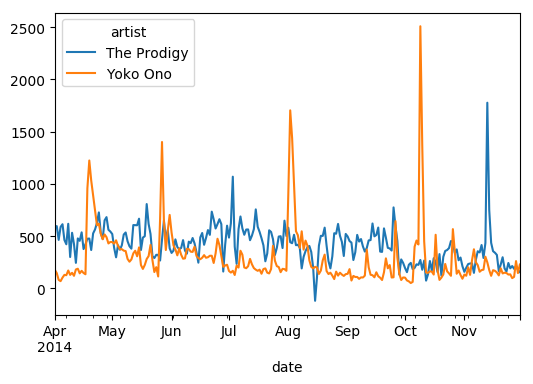

In [3]:
#part b
metrics_facebook = metrics.loc[metrics['metric'] == "Facebook likes", :]
metrics_twitter = metrics.loc[metrics['metric'] == "Twitter followers", :]
metrics_wiki = metrics.loc[metrics['metric'] == "Wikipedia pageviews", :]

#part c
metrics_facebook_pivot = metrics_facebook.pivot(index="date", columns="artist", values="value")
metrics_facebook_pivot.plot()

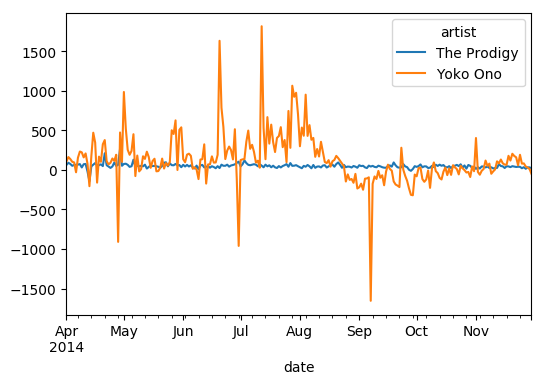

In [4]:
metrics_twitter_pivot = metrics_twitter.pivot(index="date", columns="artist", values="value")
metrics_twitter_pivot.plot()

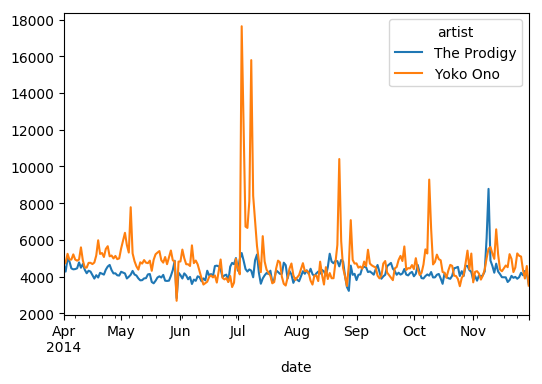

In [5]:
metrics_wiki_pivot = metrics_wiki.pivot(index="date", columns="artist", values="value")
metrics_wiki_pivot.plot()

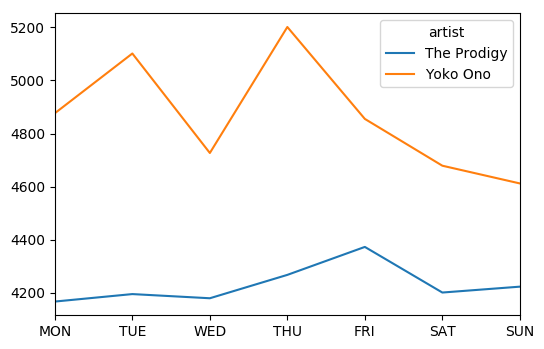

In [6]:
#part d
metrics_wiki_pivot["day_of_week"] = metrics_wiki_pivot.index.dayofweek

#part e
metrics_wiki_pivot_grouped = metrics_wiki_pivot.groupby("day_of_week").mean()
metrics_wiki_pivot_grouped.index = ['MON','TUE','WED','THU','FRI','SAT','SUN']  # optional step to show day of week as a string rather than an integer
metrics_wiki_pivot_grouped.plot()

In [7]:
# part f
metrics_wiki_pivot_prodigy = metrics_wiki_pivot.drop("Yoko Ono", axis=1)
metrics_wiki_pivot_prodigy['week_of_year'] = metrics_wiki_pivot_prodigy.index.weekofyear
metrics_wiki_pivot_prodigy_dow = metrics_wiki_pivot_prodigy.pivot(index="week_of_year", columns="day_of_week", values="The Prodigy")
metrics_wiki_pivot_prodigy_dow.head()

day_of_week,0,1,2,3,4,5,6
week_of_year,,,,,,,
14,NaN,4646.0,4279.0,4982.0,4829.0,4454.0,4403.0
15,4418.0,4460.0,4781.0,4492.0,4693.0,4382.0,4191.0
16,4327.0,4281.0,4096.0,3900.0,4083.0,3957.0,4212.0
17,4167.0,4115.0,4386.0,4556.0,4643.0,4364.0,4182.0
18,4187.0,4079.0,4065.0,4271.0,4225.5,4180.0,3906.0


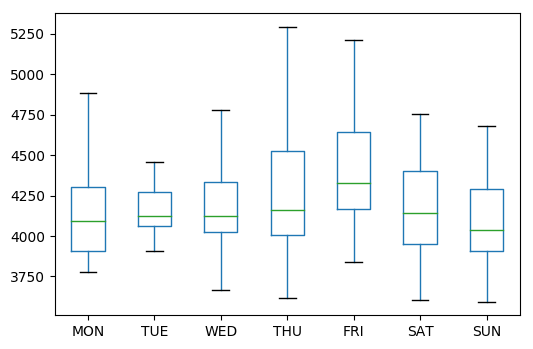

In [8]:
# part g
days = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
metrics_wiki_pivot_prodigy_dow.columns = days
metrics_wiki_pivot_prodigy_dow.plot(kind='box', sym='')